In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [5]:
df = pd.read_csv('data/Historic and Current Combined - Simplified.csv')

df_cleaned = df.dropna()

# Define features (X) and target (y)
# We'll exclude 'vat' as it's likely a unique identifier and not directly predictive
X = df_cleaned[['fail_liq', 'current']]
y = df_cleaned['fail']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize a Logistic Regression model (a simple and often effective starting point)
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [7]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability of the positive class

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score on the test set: {auc:.4f}")

AUC Score on the test set: 1.0000


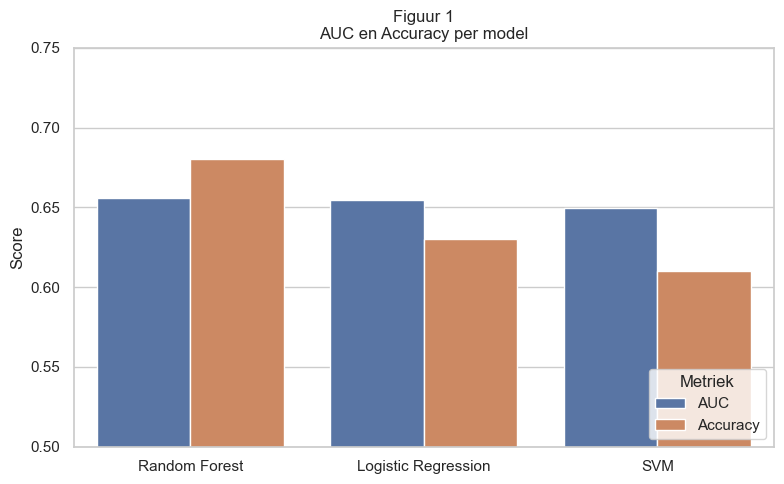

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data voor figuren
model_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'AUC': [0.6560, 0.6547, 0.6497],
    'Accuracy': [0.68, 0.63, 0.61],
    'F1_score_class_1': [0.39, 0.51, 0.51],
    'Precision_class_1': [0.57, 0.47, 0.45],
    'Recall_class_1': [0.30, 0.56, 0.58]
}

df = pd.DataFrame(model_data)

# Stijl
sns.set(style="whitegrid")

# Figuur 1: AUC en Accuracy per model
fig, ax = plt.subplots(figsize=(8, 5))
df_plot1 = df.melt(id_vars='Model', value_vars=['AUC', 'Accuracy'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=df_plot1)
plt.ylim(0.5, 0.75)
plt.title('Figuur 2\nAUC en Accuracy per model')
plt.ylabel('Score')
plt.xlabel('')
plt.legend(title='Metriek', loc='lower right')
plt.tight_layout()
plt.show()


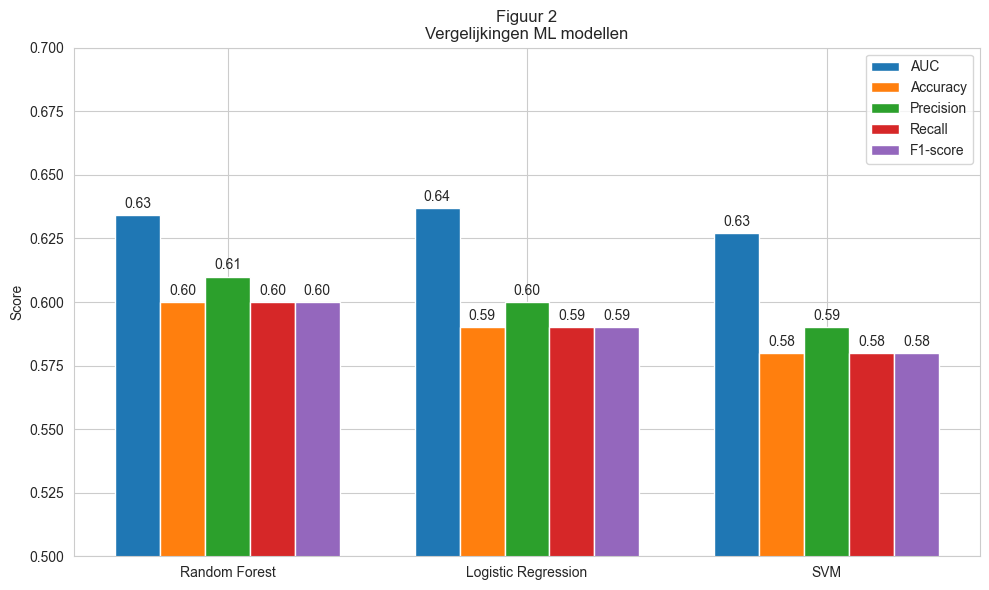

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Prestatiegegevens
models = ['Random Forest', 'Logistic Regression', 'SVM']
auc_scores = [0.6342, 0.6369, 0.6270]
accuracy_scores = [0.60, 0.59, 0.58]
precision_scores = [0.61, 0.60, 0.59]  # Gemiddeld over beide klassen
recall_scores = [0.60, 0.59, 0.58]     # Gemiddeld over beide klassen
f1_scores = [0.60, 0.59, 0.58]         # Gemiddeld over beide klassen

# X-as: modelnamen
x = np.arange(len(models))
width = 0.15  # Breedte van de balken

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Balken voor elke metriek
rects1 = ax.bar(x - 2*width, auc_scores, width, label='AUC')
rects2 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects3 = ax.bar(x, precision_scores, width, label='Precision')
rects4 = ax.bar(x + width, recall_scores, width, label='Recall')
rects5 = ax.bar(x + 2*width, f1_scores, width, label='F1-score')

# Labeling
ax.set_ylabel('Score')
plt.title('Figuur 2\nVergelijkingen ML modellen')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0.5, 0.7])
ax.legend()

# Waarden boven de balken tonen
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Verticale offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Voeg labels toe
for rects in [rects1, rects2, rects3, rects4, rects5]:
    autolabel(rects)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Stel stijl in
sns.set(style="whitegrid")

# Laad data
df = pd.read_csv("Data/gebalanceerd_bedrijven.csv")


df["review_text"] = df["review_text"].fillna("")
df["tekstlengte"] = df["review_text"].apply(len)

# Zet bedrijfsfraude-indicator om naar booleans (als dat nog niet zo is)
df["fraud"] = df["fraud"].astype(bool)


df["fraud"] = df["fraud"].map({False: "Niet-frauduleus bedrijf", True: "Frauduleus bedrijf"})

reviews_per_user = df.groupby("author_id").agg({
    "review_text": "count",
    "fraud": "first"
}).reset_index().rename(columns={"review_text": "aantal_reviews"})
#reviews_per_user["fraud"] = reviews_per_user["fraud"].map({0: "Niet-frauduleus", 1: "Frauduleus"})

# Groepeer: hoeveel reviewers hebben hoeveel reviews gedaan?
review_counts = reviews_per_user.groupby(["aantal_reviews", "fraud"]).size().reset_index(name="aantal_auteurs")




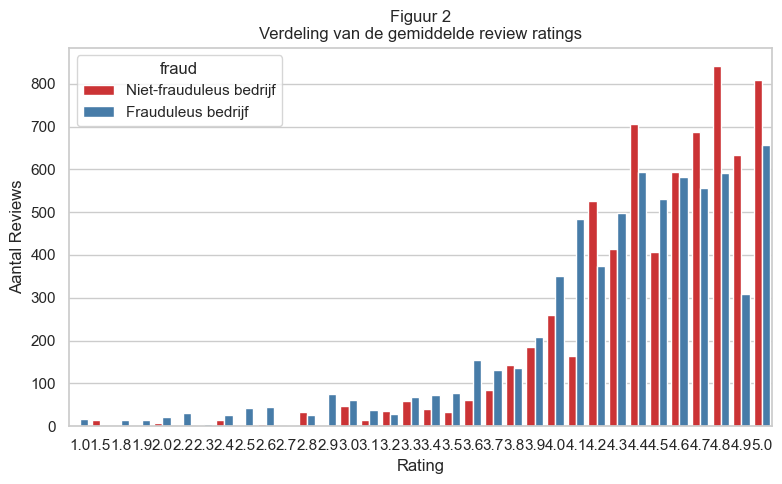

In [17]:
# 1. Verdeling van ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="rating", hue="fraud", palette="Set1") # Voeg 'hue' toe om te kleuren op basis van fraude
plt.title("Figuur 2\nVerdeling van de gemiddelde review ratings")
plt.xlabel("Rating")
plt.ylabel("Aantal Reviews")
plt.tight_layout()
plt.show()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_31012\927577958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="fraud", y="rating", palette="Set1")


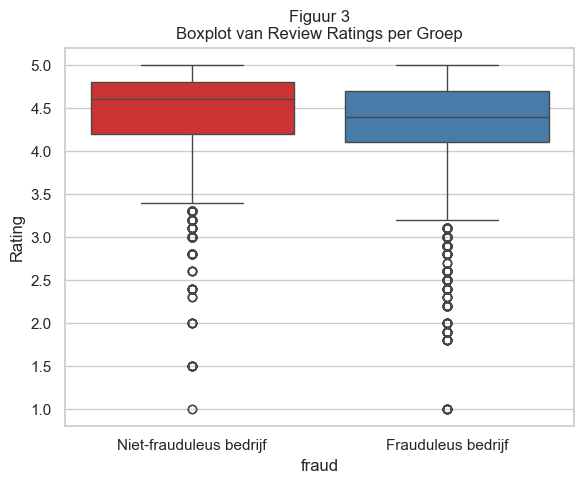

In [18]:
# 2. Boxplot van ratings per groep
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="fraud", y="rating", palette="Set1")
plt.title("Figuur 3\nBoxplot van Review Ratings per Groep")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Verdeling van tekstlengte
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tekstlengte", hue="fraud", bins=60, palette="Set2", element="step", log_scale=(False, True))
plt.title("Figuur 4\nVerdeling van Tekstlengte (log y-as)")
plt.xlabel("Tekstlengte (tekens)")
plt.ylabel("Aantal Reviews")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Boxplot van tekstlengte per groep
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="fraud", y="tekstlengte", palette="Set2")
plt.title("Figuur 5\nBoxplot van Tekstlengte per Groep")
plt.ylabel("Lengte (tekens)")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Aantal reviews per reviewer
plt.figure(figsize=(10, 6))
sns.barplot(data=review_counts, x="aantal_reviews", y="aantal_auteurs", hue="fraud", palette="Set2") # Gebruik de voorbereide DataFrame 'review_counts'
plt.yscale("log")
plt.title("Figuur 6\nAantal Reviews per Reviewer (log y-as)")
plt.xlabel("Aantal reviews door auteur")
plt.ylabel("Aantal auteurs (log)")
# Verwijder de legenda
plt.legend().remove()
plt.tight_layout()
plt.show()